In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
import warnings
from sklearn.preprocessing import StandardScaler

 
warnings.filterwarnings("ignore")
%matplotlib inline 

In [3]:
df = pd.read_excel("etf_data_final.xlsx")

In [4]:
df.head()

,Unnamed: 0,index,date,SPY_p,IWM_p,EEM_p,TLT_p,LQD_p,TIP_p,IYR_p,...,month_8,month_9,month_10,month_11,month_12,MON,TUE,WED,THU,FRI
0,0,250,2011-12-29,107.496193,66.057526,31.844088,98.016830,85.749313,102.159256,42.352482,...,0,0,0,0,1,0,0,0,1,0
1,1,251,2011-12-30,106.967743,65.701195,31.869280,98.333130,86.112694,102.124252,42.144760,...,0,0,0,0,1,0,0,0,0,1
2,2,252,2012-01-03,108.672401,66.788040,32.843678,96.857132,86.044540,102.089241,42.404408,...,0,0,0,0,0,0,1,0,0,0
3,3,253,2012-01-04,108.842880,66.422791,32.658875,95.705551,86.112694,102.185547,41.929615,...,0,0,0,0,0,0,0,1,0,0
4,4,254,2012-01-05,109.132668,66.796974,32.516071,95.535225,85.741760,102.378059,42.233788,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [6]:
print(df.columns)

Index(['index', 'date', 'SPY_p', 'IWM_p', 'EEM_p', 'TLT_p', 'LQD_p', 'TIP_p',
       'IYR_p', 'GLD_p',
       ...
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'MON', 'TUE',
       'WED', 'THU', 'FRI'],
      dtype='object', length=282)


In [7]:
df_col = ['SPY', 'IWM', 'EEM', 'TLT', 'LQD', 'TIP', 'IYR',
       'GLD', 'FXE']

dummy = ['month_1', 
         'month_2', 
         'month_3', 
         'month_4', 
         'month_5', 
         'month_6', 
         'month_7', 
         'month_8', 
         'month_9',
         'month_10',
         'month_11',
         'month_12',
         'MON', 'TUE','WED', 'THU', 'FRI']

#td = [1, 3, 5, 10, 20, 40, 60, 120, 250]
td = [1, 60, 250]

SPY
Real Data Processing for horizon =  1
Top 30 Sorted Feature Importance


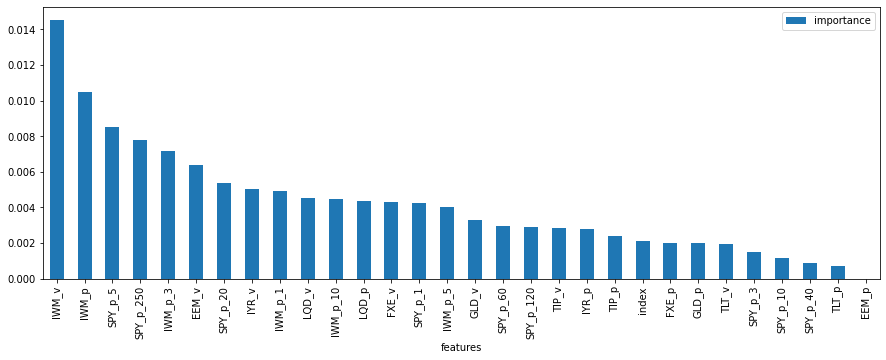

Real Data Processing for horizon =  60
Top 30 Sorted Feature Importance


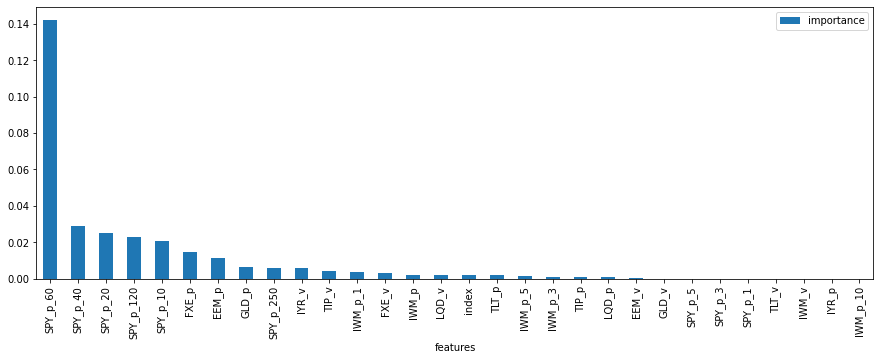

Real Data Processing for horizon =  250
Top 30 Sorted Feature Importance


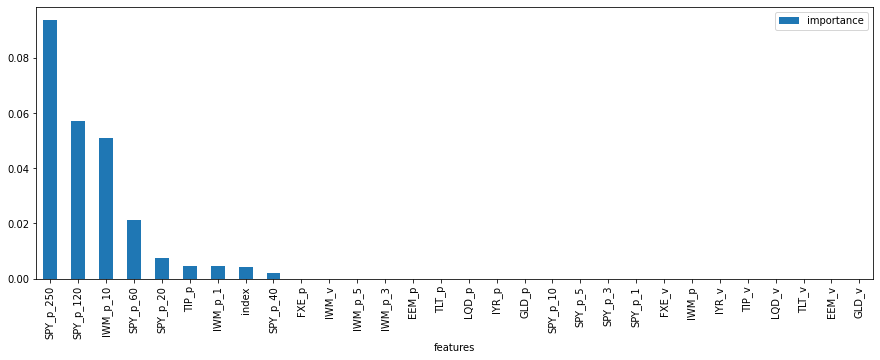

IWM
Real Data Processing for horizon =  1
Top 30 Sorted Feature Importance


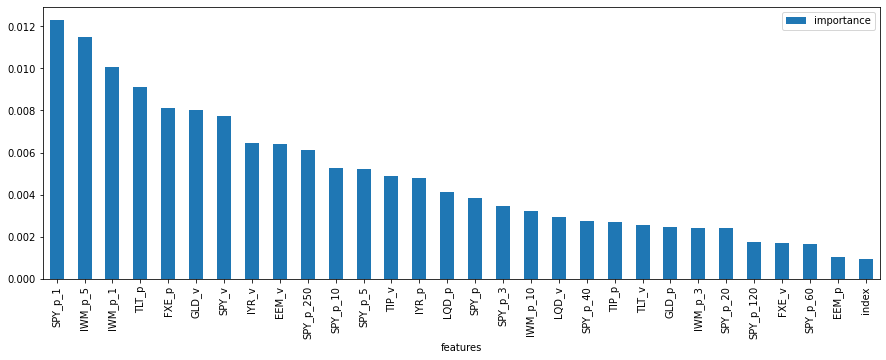

Real Data Processing for horizon =  60
Top 30 Sorted Feature Importance


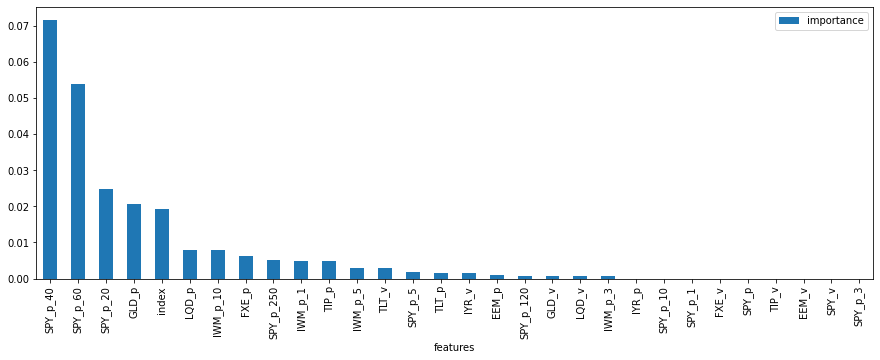

Real Data Processing for horizon =  250
Top 30 Sorted Feature Importance


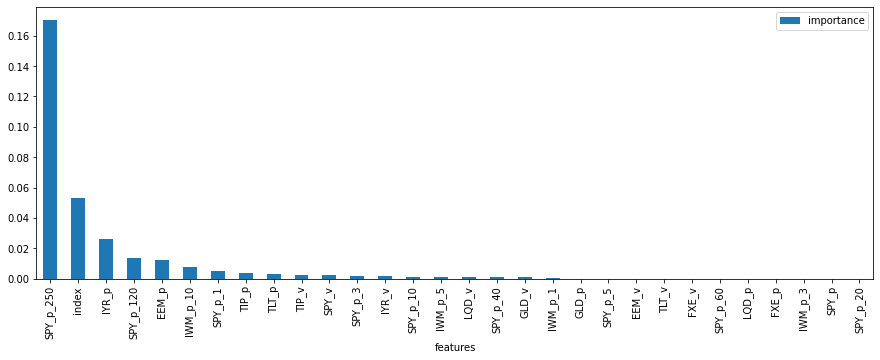

EEM
Real Data Processing for horizon =  1
Top 30 Sorted Feature Importance


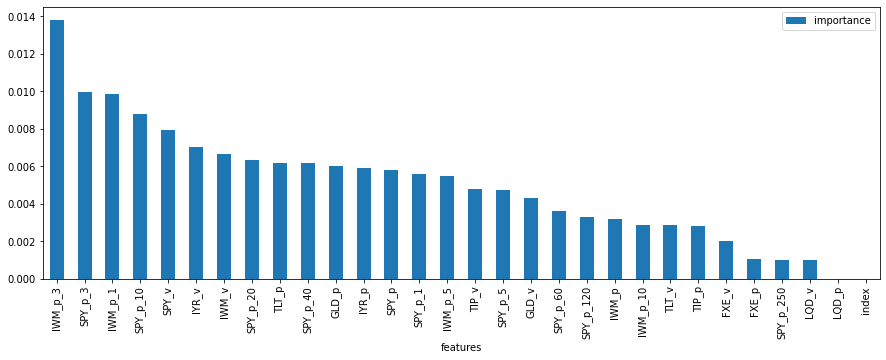

Real Data Processing for horizon =  60
Top 30 Sorted Feature Importance


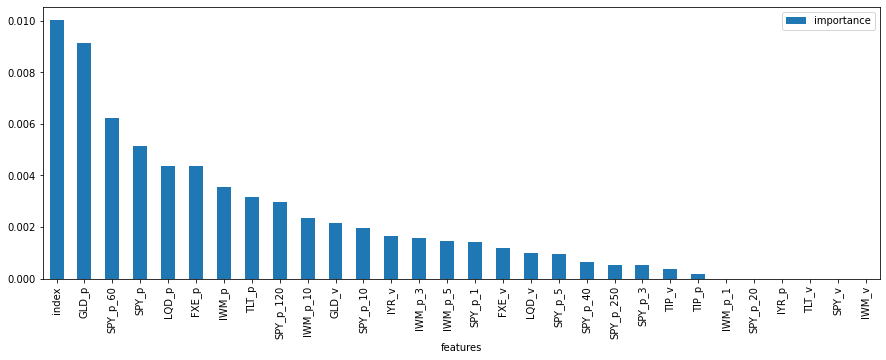

Real Data Processing for horizon =  250
Top 30 Sorted Feature Importance


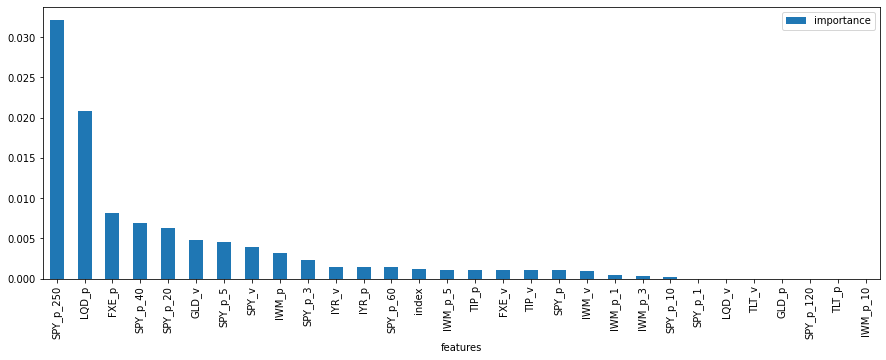

TLT
Real Data Processing for horizon =  1
Top 30 Sorted Feature Importance


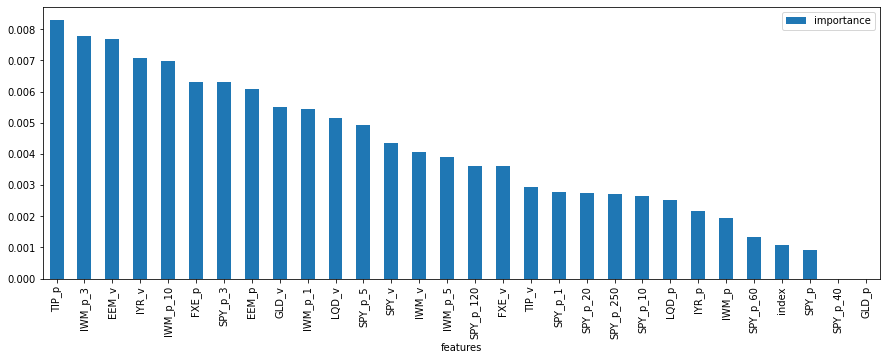

Real Data Processing for horizon =  60
Top 30 Sorted Feature Importance


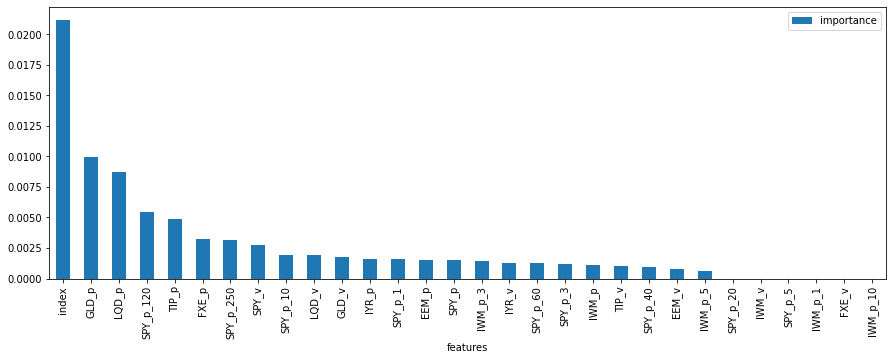

Real Data Processing for horizon =  250
Top 30 Sorted Feature Importance


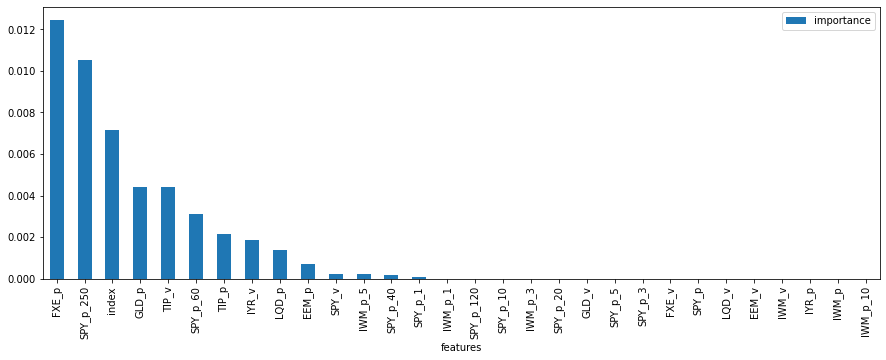

LQD
Real Data Processing for horizon =  1
Top 30 Sorted Feature Importance


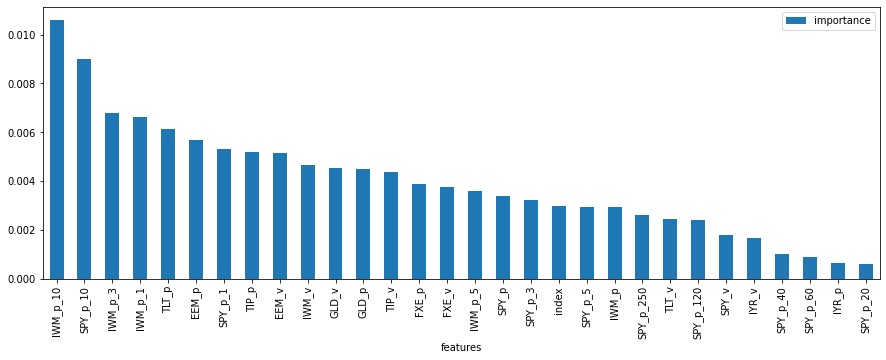

Real Data Processing for horizon =  60
Top 30 Sorted Feature Importance


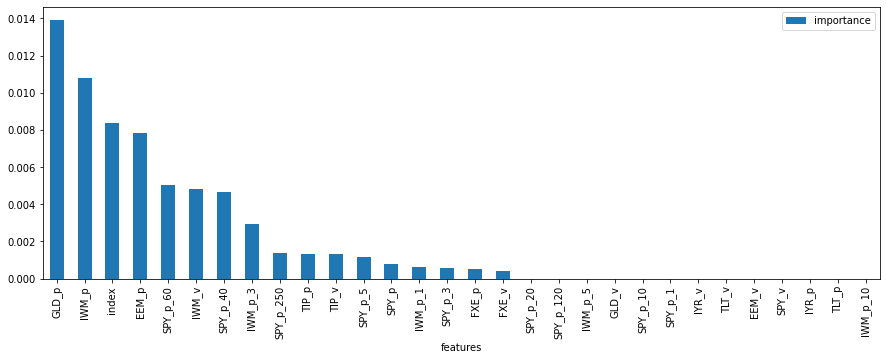

Real Data Processing for horizon =  250
Top 30 Sorted Feature Importance


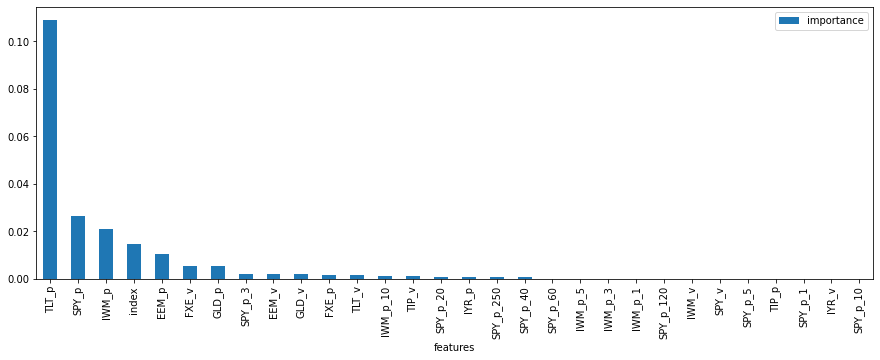

TIP
Real Data Processing for horizon =  1
Top 30 Sorted Feature Importance


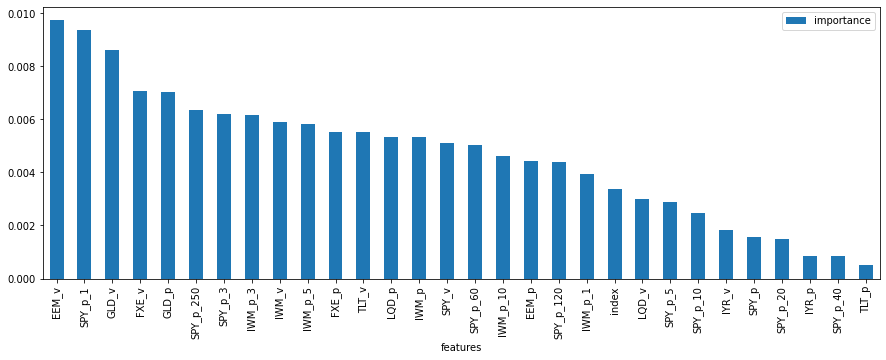

Real Data Processing for horizon =  60
Top 30 Sorted Feature Importance


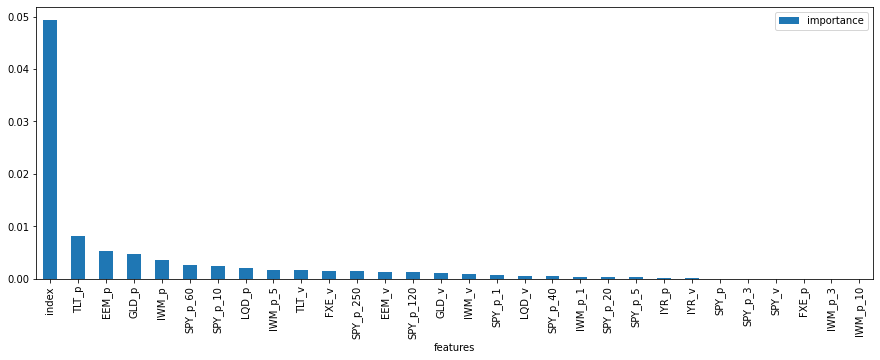

Real Data Processing for horizon =  250
Top 30 Sorted Feature Importance


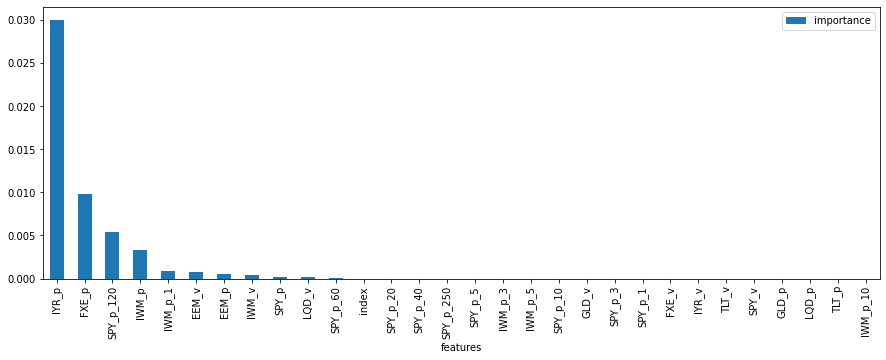

IYR
Real Data Processing for horizon =  1
Top 30 Sorted Feature Importance


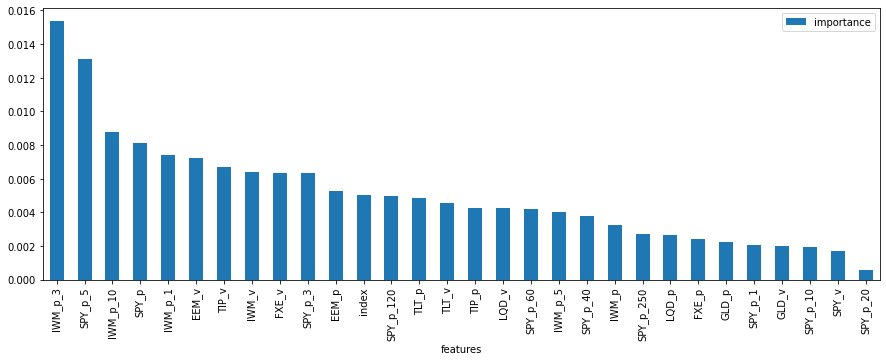

Real Data Processing for horizon =  60
Top 30 Sorted Feature Importance


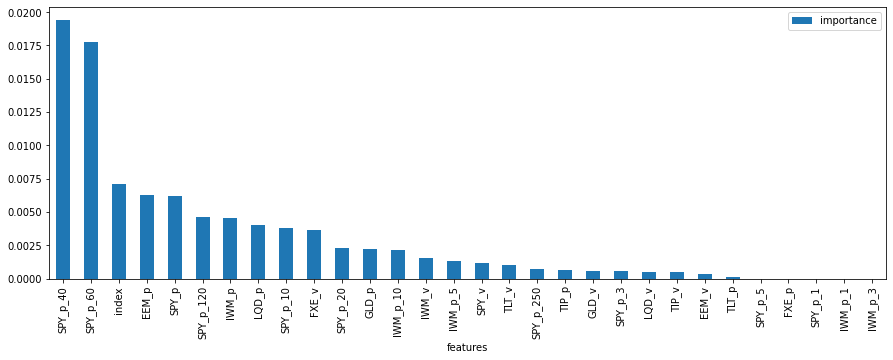

Real Data Processing for horizon =  250
Top 30 Sorted Feature Importance


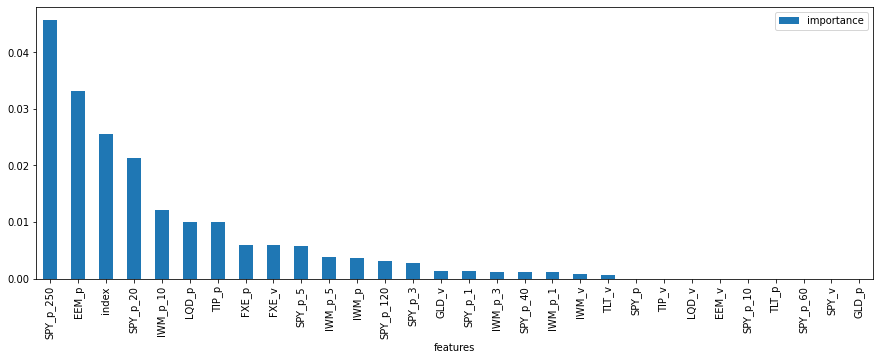

GLD
Real Data Processing for horizon =  1
Top 30 Sorted Feature Importance


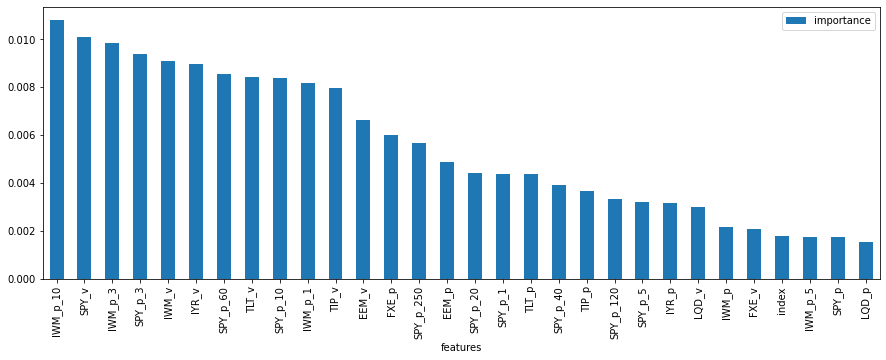

Real Data Processing for horizon =  60
Top 30 Sorted Feature Importance


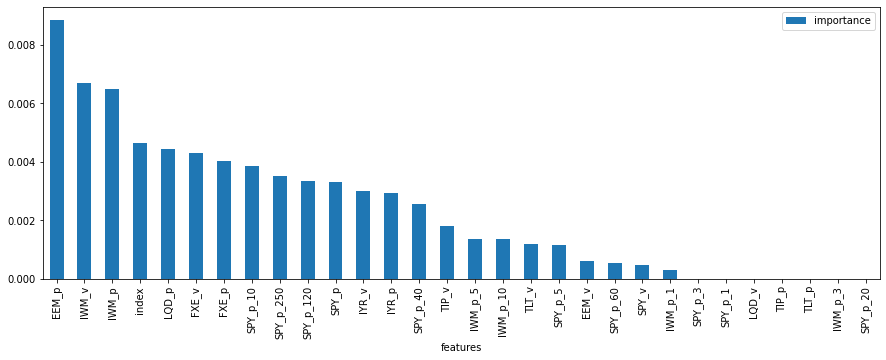

Real Data Processing for horizon =  250
Top 30 Sorted Feature Importance


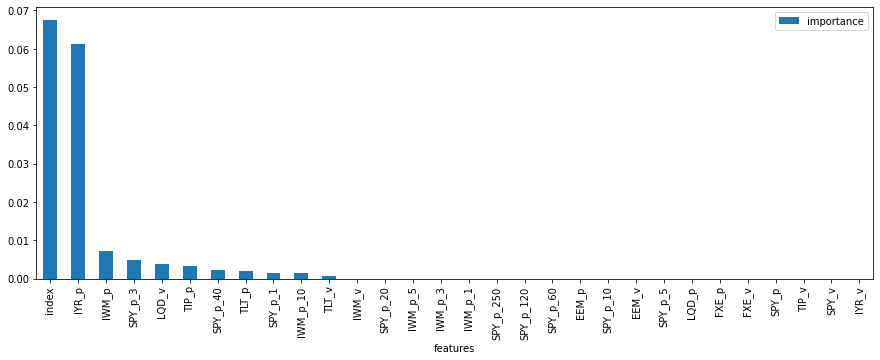

FXE
Real Data Processing for horizon =  1
Top 30 Sorted Feature Importance


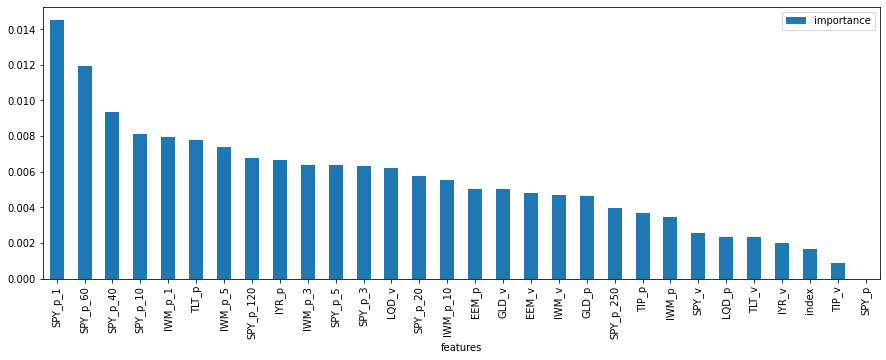

Real Data Processing for horizon =  60
Top 30 Sorted Feature Importance


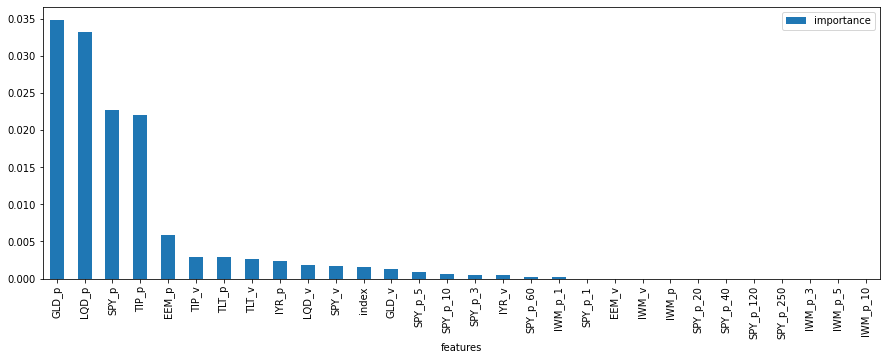

Real Data Processing for horizon =  250
Top 30 Sorted Feature Importance


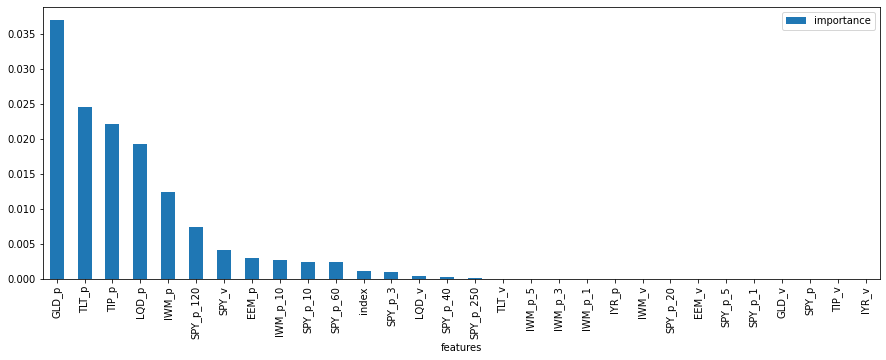

Wall time: 8.69 s


In [8]:
%%time

# all horizon feature importance

for i in df_col:
    
    print(i)
    
    sub_result = {}
    
    for j in td:
                
        y_col = str(i)+"_"+str(j)+"_y"
        p_col = str(i)+"_p"
        v_col = str(i)+"_v"

        #df_data[[r_col, v_col, y_col]] = df[[r_col, v_col, y_col]]
        
        X = df.drop([y_col,p_col,v_col, "date","month","week"], axis = 1)
        y = df[y_col]
                
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=0.3,
                                                            random_state=0)
                
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
                
        
        print("Real Data Processing for horizon = ",j)
        
        
        model = RandomForestClassifier()
        
        model.fit(X_train_std, y_train)
        
        importances = model.feature_importances_
        
        default_imp=pd.DataFrame(data={'importance':importances, 'features':X_train.columns})
        
        default_imp = default_imp.head(30)
        
        print("Top 30 Sorted Feature Importance")
        default_imp=default_imp.set_index('features')
        default_imp=default_imp.sort_values('importance',ascending=False)
        default_imp.plot(kind='bar',figsize=(15,5))
        plt.show()
        
        

In [9]:
ft_col = ['SPY_p', 'IWM_p', 'EEM_p', 'TLT_p', 'LQD_p', 'TIP_p', 'IYR_p', 'GLD_p', 'FXE_p',
         'SPY_v', 'IWM_v', 'EEM_v', 'TLT_v', 'LQD_v', 'TIP_v', 'IYR_v', 'GLD_v', 'FXE_v']


SPY
Real Data Processing for horizon =  20


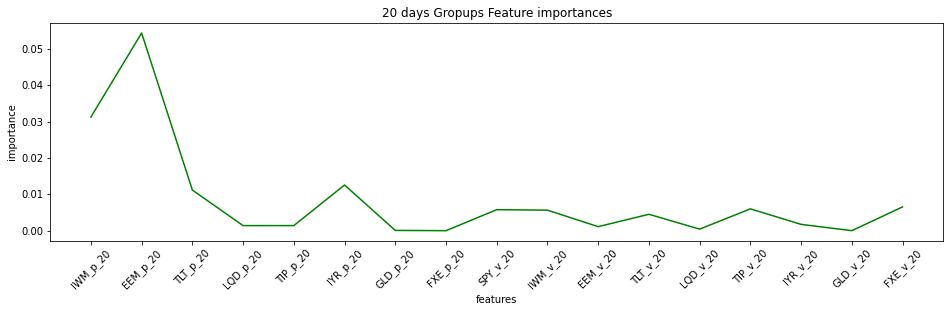

IWM
Real Data Processing for horizon =  20


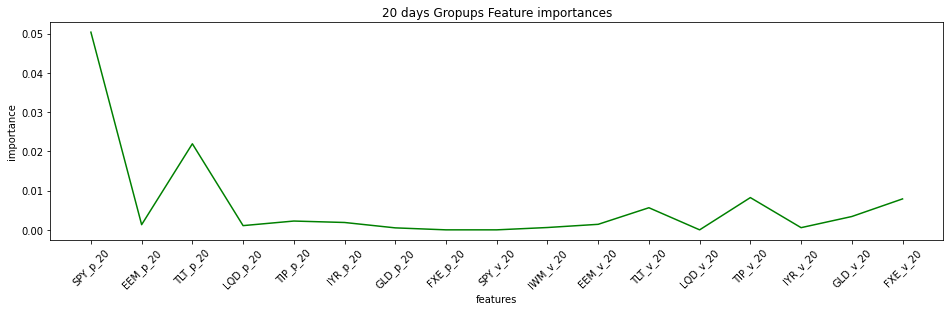

EEM
Real Data Processing for horizon =  20


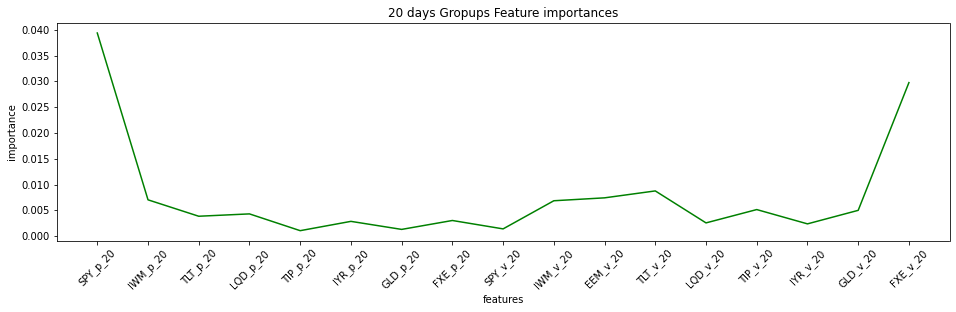

TLT
Real Data Processing for horizon =  20


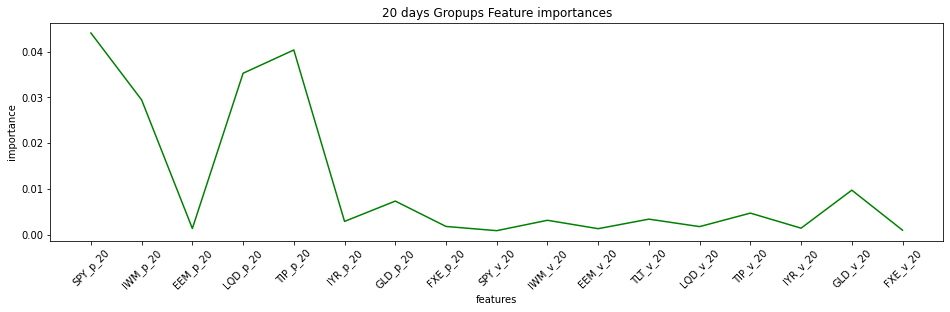

LQD
Real Data Processing for horizon =  20


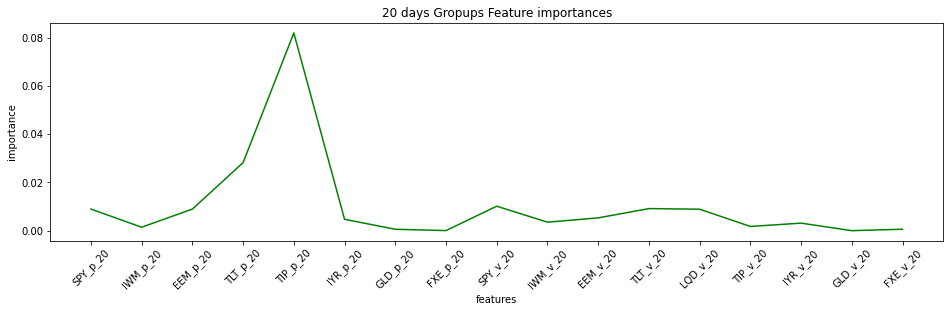

TIP
Real Data Processing for horizon =  20


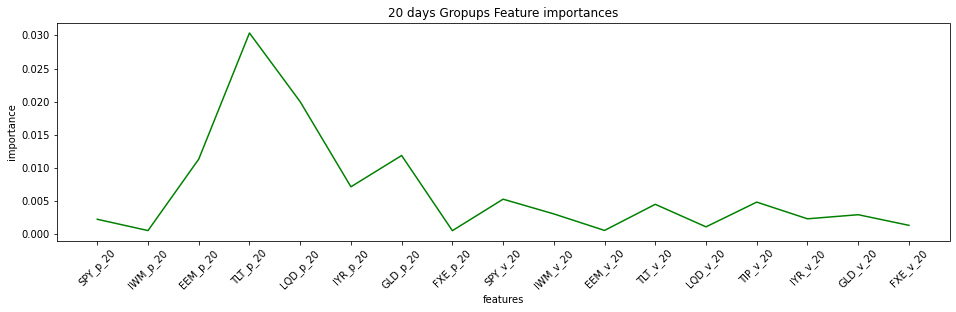

IYR
Real Data Processing for horizon =  20


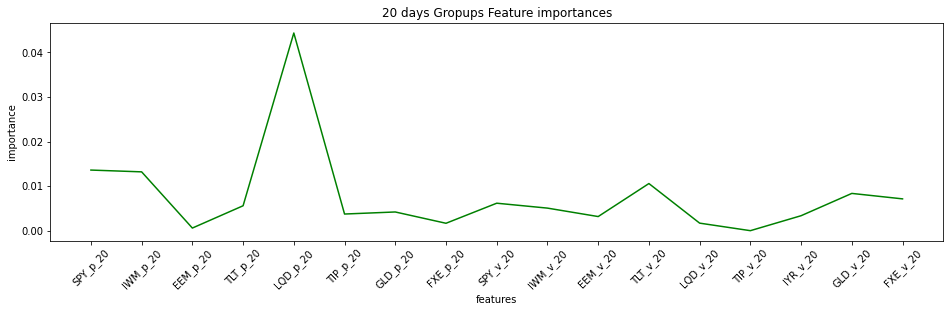

GLD
Real Data Processing for horizon =  20


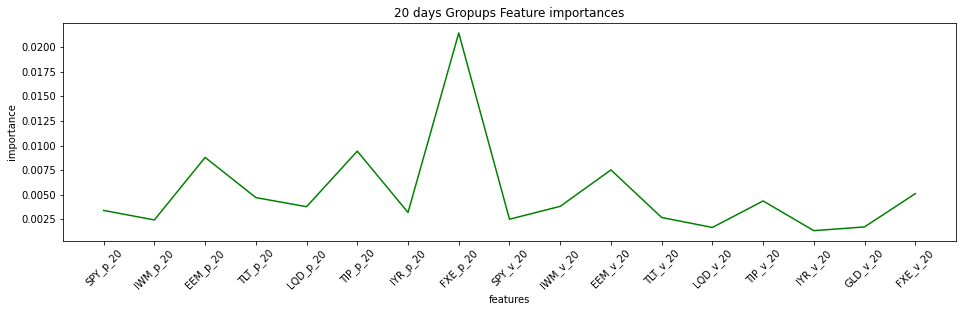

FXE
Real Data Processing for horizon =  20


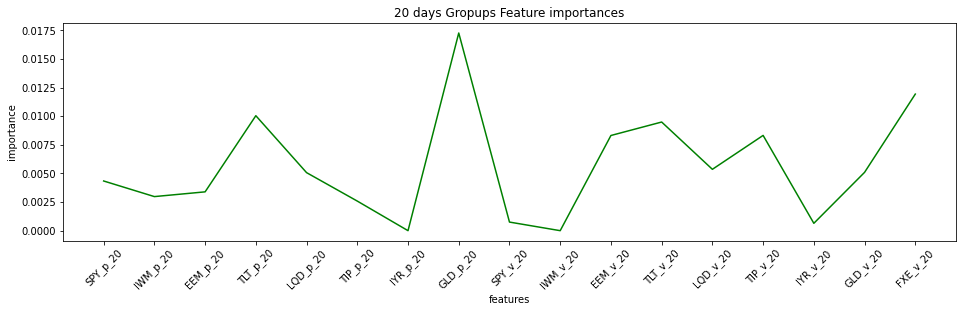

Wall time: 1.93 s


In [10]:
%%time

# XX days Gropups Feature importances

f_td = 20

all_result = {}

for i in df_col:
    
    print(i)
    
    sub_result = {}
                
    y_col = str(i)+"_"+str(f_td)+"_y"
    p_col = str(i)+"_p"
    v_col = str(i)+"_v"

    X = df.drop([y_col,p_col,v_col, "date","month","week"], axis = 1)
    y = df[y_col]


    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.3,
                                                        random_state=0)

    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)


    print("Real Data Processing for horizon = ",f_td)


    model = RandomForestClassifier()

    model.fit(X_train_std, y_train)

    importances = model.feature_importances_

    default_imp=pd.DataFrame(data={'importance':importances, 'features':X_train.columns})

    #default_imp = default_imp[ft_col]

    all_result[i] = default_imp
    
    #x = default_imp['features'][1:16]
    #y = default_imp['importance'][1:16]
    
    p_name = "_p_"+str(f_td)
    v_name = "_v_"+str(f_td)
    del_name = str(i)+"_p_"+str(f_td)
    
    default_imp_horizon = default_imp[default_imp.features.str.contains(p_name) | default_imp.features.str.contains(v_name)]
    default_imp_horizon = default_imp_horizon[default_imp["features"] != str(del_name)]
    
    x = default_imp_horizon['features']
    y = default_imp_horizon['importance']
    
    
    plt.figure(figsize=(16,4))
    #sns.set(font_scale=2)
    plt.plot(x,y, color='green',linestyle='solid')
    plt.title('{} days Gropups Feature importances'.format(f_td))
    plt.xlabel("features")
    plt.xticks(rotation = 45)
    plt.ylabel("importance")
    plt.show()
    
 
        